In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import unittest
import time
import re
import pandas as pd
import os
import seaborn as sns
import unidecode

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pandas.util.testing import assert_frame_equal

import shap

### Question 1

As per the TDD (Test Driven Development) recommendations, a test should be written before the actual function to be tested:

In [2]:
class FibonacciTests(unittest.TestCase):
    def test_fShouldReturnCorrectAnswer(self):
        self.assertEqual(f(0), 0)
        self.assertEqual(f(1), 1)
        self.assertEqual(f(5), 5)
        self.assertEqual(f(10), 55)
    def test_fShouldRaiseExceptionWithNegativeArgument(self):
        with self.assertRaises(ValueError):
            f(-1)

The fibonacci function could be solved with a <b>recursive function</b>, but it would make lots of recalculations unnecessarily, due to the fact that f(n) = f(n-1) + f(n-2). An <b>alternative way</b> to solve the program (albeit, using more memory) is to make use of <b>dynamic programming</b>. The principle is to save in memory all the results that have already been calculated. In this case, we will do that, but only keeping the last 2 numbers with a bottom-up approach, which will also save up on memory.

In [3]:
def f(n):
    if n == 1 or n == 0:
        return n
    if n < 0:
        raise ValueError('Negative numbers are not accepted!')
    before_2, before_1 = 0, 1
    for i in range(2, n+1):
        result = before_2 + before_1
        before_2 = before_1
        before_1 = result
    return result

In [4]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


### Question 2

In [5]:
t1 = time.time()
f10000 = f(10000)
t2 = time.time()

print("Result for f(10000) = {}\n"
     "Calculation time = {}"
     .format(f10000, t2 - t1))

Result for f(10000) = 336447648764317832666216120051075433103021484606800639065647699746800814421666623681555955136337340255820653326808361593737347904838652682630408924630564318873545443695598274916066020998841839338646527313000888302692356736131351175792974378544137521305205043477016022647583189065278908551543661595829872796829875106312005754287834532155151038708182989697916131278562650331954871402142875326981879620469360978799003509623022910263681314931952756302278376284415403605844025721143349611800230912082870460889239623288354615057765832712525460935911282039252853934346209042452489294039017062338889910858410651831733604374707379085526317643257339937128719375877468974799263058370657428301616374089691784263786242128352581128205163702980893320999057079200643674262023897831114700540749984592503606335609338838319233867830561364353518921332797329081337326426526339897639227234078829281779535805709936910491754708089318410561463223382174656373212482263830921032977016480547262438423748624

Since the algorithm only passes by each number a single time up to <i>n</i>, its time complexity will be O(n). As for memory, since we're only keeping in memory the two previous numbers (as well as the current one), it is a constant, in other words, O(1).

### Question 3

We can solve this problem by performing a BFS (Breadth First Search) on the binary tree, starting from its root, and keeping track of the level being visited.
For instance, when we begin the algorithm, we will start from the root and assign it level 0. All the children of the root will then be discovered, assigned level 1, and put into a queue. This process will continue, always assigning level $n+1$ to the children of the current node and adding them to the queue, until there are no more nodes. <br>
Here, we are only interested in listing the nodes of a given level. As such, the process will be mostly unchanged, but only when a node of the desired level is discovered will it be printed, and its children will not be put in the queue since they do not interest us. <br><br>

Pseudocode:

```
find_nodes_in_level(tree T, desired_level):
   result_nodes = []
   queue Q
   root = get root of T
   put (node: root, level: 0) in Q, where 0 is level of root node
   while Q is not empty:
      current_node = get next node in Q
      if current_node.level == desired_level:
          put current_node in result_nodes
          continue
      for each child in current_node.children:
         put (node: child, level: current_node.level + 1) in Q
    print result_nodes
```

### Question 4

One solution is to read this access log by batches, reading one ID (or a small group of IDs) at a time, instead of reading the whole access log. However, this still doesn't solve the whole problem, as we also need to know the number of unique IDs that accessed the website. In other words, we need to keep track of the IDs that were already encountered. Or, rather, since the IDs are sequential, from 1 to 1 billion, we can map them to positions in an array (so, the first position in the array is relative to ID 1, and so on).<br>

In this case, we only need to know if an ID has been seen (and not the number of times it has been seen), so the most memory efficient solution is to use an array of booleans, which only occupy 1 bit each (indicating if it has been seen or not). Since we have 1 billion ($10^9$) different IDs, we will, therefore, need $\frac{10^9}{8*1024*1024} \approx 120$MB of RAM. Our 512MB RAM machine should thus be able to store all the information necessary for this task. Then, we only need to iterate over this array of booleans and count the number of 1s, which will only take a single 32-bit integer.

### Question 5

In [6]:
class RegexTests(unittest.TestCase):
    def test_regexShouldReturnArrayOfNames(self):
        names = ['Fulano da Silva', 'Beltrano José Pereira', 
                 'Ciclano Feliciano Marciano', 'Ildo Vieira Pereira', 
                 'João Ninguém', 'Fulaninha']
        unformatted_names = ("nome: Fulano da Silvanome: Beltrano José Pereira "
                             "nome: Ciclano Feliciano Marcianonome: Ildo Vieira "
                             "Pereiranome: João Ninguém nome: Fulaninha")
        self.assertEqual(regex_get_names(unformatted_names), names)

In [7]:
def regex_get_names(s):
    regex = r"(?<=nome: ).+?(?=nome:|$| nome:)"
    return re.findall(regex, s)

s_names = ("nome: Fulano da Silvanome: Beltrano José Pereira "
           "nome: Ciclano Feliciano Marcianonome: Ildo Vieira "
           "Pereiranome: João Ninguém nome: Fulaninha")

s = regex_get_names(s_names)
print("Before Regex:\n{}\n"
     "After Regex:\n{}"
     .format(s_names, s))

Before Regex:
nome: Fulano da Silvanome: Beltrano José Pereira nome: Ciclano Feliciano Marcianonome: Ildo Vieira Pereiranome: João Ninguém nome: Fulaninha
After Regex:
['Fulano da Silva', 'Beltrano José Pereira', 'Ciclano Feliciano Marciano', 'Ildo Vieira Pereira', 'João Ninguém', 'Fulaninha']


In [8]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


# Part 2 - O Caso Energia

Several attempts were made here to better understand the dataset before continuing. Some characteristics were noticed, but I was not sure what to make of some of them. For instance:

<li>Texts are not unique. In fact, if only unique texts are taken into consideration, the number of documents would be cut in about half! Some texts are repeated in as much as 2000 different documents! I was unsure if I could just remove these cases, and as such decided to keep them as is.</li>
<li>The filename appeared to work as a sort of identifier for the document, with the last number being the part of the document, for documents that are divided into more than one file. However, they can appear in different folders (in other words, as being classified in different topics). Also, a "sentença" and a "decisão" can have the same identifier, which seemed awkward. Attempts were made to put these informations together, and work on classifying and ensemble of documents, but this created difficulties especially with respect to the documents having different topics (which one to choose?). As such, this direction was left untouched.</li>
<br>
When comparing the dataset to the classification report on github, a few other things were found. Namely:
<li>The different number of data points on the github report and on the received dataset.</li>
<li>The disappearance of the "DanosEletrodomésticos" topic from the github report.</li>
Some kind of preprocessing, and even reclassification, had to have been done to change the data so drastically. In the following steps, I don't intend to reverse engineer the machine learning model that produced those results. However, I will perform a few changes to the dataset.
<br>
First and foremost, to try and better understand each class, documents were accessed and read manually. This proved useful in a number of ways. I was able to see why "DanosEletrodomesticos" was removed from the dataset. All the documents in this category seemed to be there due to the presence of the word "danos". But more often than not, it was pointing to "danos morais", and not to actual, material damage (although some cases *did* talk about material damage in other folders).
Second, it seemed that a lot of documents were misclassified. In some cases, there was no clear subject to be found in the document. In others, the subject was just wrong. And sometimes, more than one was possible. A machine learning model could be trained on top of this, but it would only learn how to reproduce the faults in the dataset.

First step was, then, trying to improve the dataset a little bit, removing the "DanosEletrodomésticos" class altogether, and recreating the other classes. The way I tried doing this was using a table with chosen words for each topic, much like task 3 in these exercises ("O Caso Telecom"). 

But how to choose these words? 

For this, a LogisticRegression model was used with the given dataset. The goal here is not to build a useful classifier, but to use the coefficients given by the classifier, along with human comprehension, so as to try and find positive and negative words of each class that would make sense. Even if there are a lot of mistakes, the classifier should be able to find some useful information that could be used to re-classify the documents.

In [9]:
data = []
class_directories = os.listdir('energia')
for directory in class_directories:
    files = os.listdir(f'energia/{directory}')
    for file in files:
        f = open(f'energia/{directory}/{file}', 'r', encoding='utf-8')
        data.append([file, f.read(), directory])
        
columns = ['filename', 'text', 'topic']
df = pd.DataFrame(data, columns=columns)

In [10]:
df.head(5)

,filename,text,topic
0,decisao-0000027-15.2018.8.19.0206-0.txt,Não sendo a hipótese de extinção do processo s...,CobrancaServicoNaoFornecido
1,decisao-0000056-65.2018.8.19.0206-0.txt,1. Recebo os embargos de declaração opostos p...,CobrancaServicoNaoFornecido
2,decisao-0000167-11.2018.8.19.0057-0.txt,1 - Defiro J.G. \n\n2 - Indefiro tutela anteci...,CobrancaServicoNaoFornecido
3,decisao-0000403-15.2018.8.19.0072-0.txt,Trata-se de pedido de antecipação dos efeitos ...,CobrancaServicoNaoFornecido
4,decisao-0000530-21.2018.8.19.0211-0.txt,"1. A isenção do pagamento de custas, quando ex...",CobrancaServicoNaoFornecido


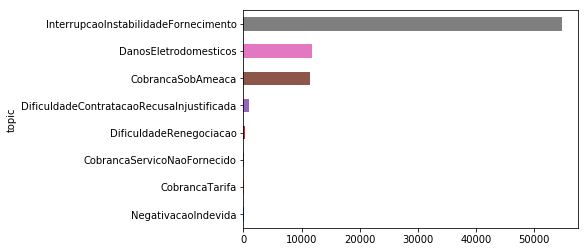

In [11]:
df.groupby('topic').text.count().sort_values(ascending=True).plot.barh()
plt.show()

In [12]:
X = df.text
y = df.topic

In [13]:
vectorizer = TfidfVectorizer(max_df=0.7, min_df=10, max_features=500)
X_tfidf = vectorizer.fit_transform(X)

clf = LogisticRegression()
clf.fit(X_tfidf, y)

y_pred = clf.predict(X_tfidf)
print(classification_report(y, y_pred))

C:\Users\berna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\berna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\berna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                           precision    recall  f1-score   support

              CobrancaServicoNaoFornecido       1.00      0.21      0.35       163
                        CobrancaSobAmeaca       0.96      0.98      0.97     11511
                           CobrancaTarifa       0.00      0.00      0.00       135
                    DanosEletrodomesticos       0.95      0.94      0.94     11775
DificuldadeContratacaoRecusaInjustificada       0.85      0.45      0.59       922
                  DificuldadeRenegociacao       0.82      0.05      0.09       305
     InterrupcaoInstabilidadeFornecimento       0.97      0.99      0.98     54803
                      NegativacaoIndevida       0.00      0.00      0.00        64

                                micro avg       0.96      0.96      0.96     79678
                                macro avg       0.69      0.45      0.49     79678
                             weighted avg       0.96      0.96      0.96     79678



In [14]:
coefs = clf.coef_
terms = np.array(vectorizer.get_feature_names())
class_names = clf.classes_
n_top = 10
for i in range(len(coefs)):
    class_name = class_names[i]
    class_coefs = coefs[i]
    top_pos_class_words = terms[np.argsort(class_coefs)[::-1][:n_top]]
    top_neg_class_words = terms[np.argsort(class_coefs)[:n_top]]
    print(f"{class_name} top pos and neg words:\n{top_pos_class_words}\n{top_neg_class_words}")
    print()

CobrancaServicoNaoFornecido top pos and neg words:
['consumo' 'faturas' 'uma' 'mensal' '2017' 'necessidade' 'prevista'
 'prestação' 'como' 'estão']
['toi' 'multa' 'dano' 'parcelamento' 'irregularidade' '00' 'crédito' 'nº'
 'serviço' 'caso']

CobrancaSobAmeaca top pos and neg words:
['toi' 'irregularidade' 'termo' 'ocorrência' 'multa' 'cobrança' 'deferida'
 'cobranças' 'execução' 'acima']
['respectiva' 'aguarde' 'serviços' 'publique' 'judicial' 'disposto'
 'intime' 'face' 'indefiro' 'diária']

CobrancaTarifa top pos and neg words:
['foro' 'consumo' 'serviços' 'nos' 'súmula' 'ação' 'fornecimento' 'juízo'
 'valor' 'pelo']
['toi' 'parcelamento' 'termo' 'defesa' 'artigo' 'nas' 'irregularidade'
 'débito' 'fatos' 'um']

DanosEletrodomesticos top pos and neg words:
['dano' 'danos' 'probabilidade' 'irreparável' 'fluencia' 'receio' 'morais'
 'juros' 'direito' 'risco']
['cobrança' 'faturas' 'toi' 'conta' 'fatura' 'cobranças' 'consumo'
 'irregularidade' 'defesa' 'entendo']

DificuldadeContratacaoR

Here, we can see a list of the top 10 most positive and most negative words for each class. This is what was used to aid in the following step: creating a new dataset, with the labels being given by the presence of certain words.

In [15]:
new_df = []
for row in df.values:
    new_row = list(row)[:2]
    if 'TOI' in row[1]:
        new_row.append('CobrancaSobAmeaca')
    elif 'nome' in row[1] and 'cadastro' in row[1]:
        new_row.append('NegativacaoIndevida')
    elif 'cobrança' in row[1] or 'tarifa' in row[1]:
        new_row.append('CobrancaTarifa')
    elif 'consumo' in row[1] or 'fatura' in row[1] or 'média' in row[1]:
        new_row.append('CobrancaServicoNaoFornecido')
    elif 'imóvel' in row[1] or 'locador' in row[1] or 'inquilino' in row[1] or 'proprietário' in row[1]:
        new_row.append('DificuldadeContratacaoRecusaInjustificada')
    elif 'parcelamento' in row[1] or 'contas' in row[1] or 'renegociação' in row[1] or 'contrato' in row[1]:
        new_row.append('DificuldadeRenegociacao')
    elif 'interrupção' in row[1] or 'fornecimento' in row[1] or 'corte' in row[1]:
        new_row.append('InterrupcaoInstabilidadeFornecimento')
    else:
        new_row.append('DemandaNaoResolvida')
    new_df.append(new_row)
new_df = pd.DataFrame(new_df, columns=['filename', 'text', 'topic'])

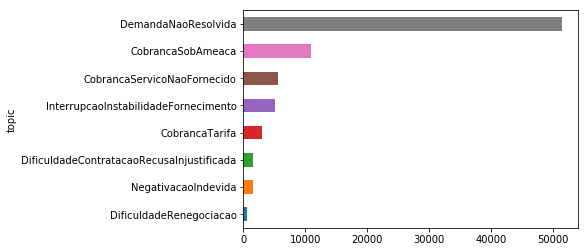

In [16]:
new_df.groupby('topic').text.count().sort_values(ascending=True).plot.barh()
plt.show()

The new dataset, even though still largely imbalanced and still with some labeling errors, looks a little better than before. We will try building a classification model with it. First, the dataset will be split into 75% train and 25% test. The test will be used for the classification report. Also, instead of a Logistic Regression, a Random Forest Classifier will be used instead. Moreover, the model will give weights to each class based on its proportion in the dataset, which should help balance the results.

In [17]:
X = new_df.text
y = new_df.topic

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

C:\Users\berna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                                           precision    recall  f1-score   support

              CobrancaServicoNaoFornecido       0.89      0.89      0.89      1418
                        CobrancaSobAmeaca       0.95      0.99      0.97      2714
                           CobrancaTarifa       0.93      0.81      0.86       724
                      DemandaNaoResolvida       0.98      0.99      0.99     12896
DificuldadeContratacaoRecusaInjustificada       0.93      0.80      0.86       389
                  DificuldadeRenegociacao       0.77      0.36      0.49       147
     InterrupcaoInstabilidadeFornecimento       0.94      0.91      0.92      1272
                      NegativacaoIndevida       0.96      0.83      0.89       360

                                micro avg       0.96      0.96      0.96     19920
                                macro avg       0.92      0.82      0.86     19920
                             weighted avg       0.96      0.96      0.96     19920



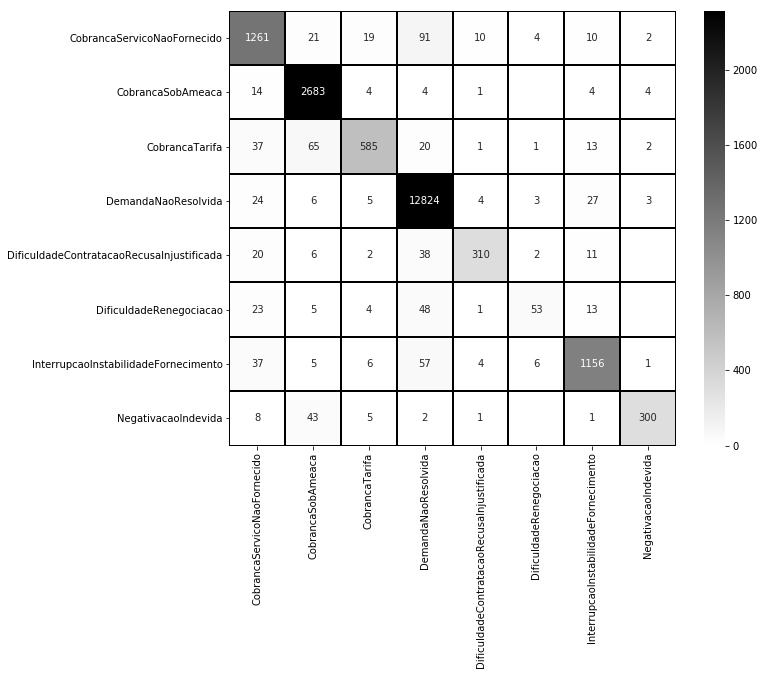

In [18]:
vectorizer = TfidfVectorizer(max_df=0.7, min_df=10, max_features=500)
train_X_tfidf = vectorizer.fit_transform(train_X)
val_X_tfidf = vectorizer.transform(val_X)

clf = RandomForestClassifier(class_weight='balanced')
clf.fit(train_X_tfidf, train_y)

y_pred = clf.predict(val_X_tfidf)
print(classification_report(val_y, y_pred))

topic_names = np.unique(y)
heatmap_data = confusion_matrix(val_y, y_pred)
mask = heatmap_data == 0
plt.figure(figsize=(10,8))
sns.heatmap(
    heatmap_data, 
    xticklabels=topic_names, 
    yticklabels=topic_names, 
    cmap='binary', 
    linecolor='black', 
    linewidth=1,
    annot=True,
    robust=True,
    fmt='g',
    mask=mask
)
plt.show()

The results don't look too bad, overall. Still, a few classes seem to be ambiguous enough that the model can't always decide when a document is part of it (thus the low recall for "DificuldadeRenegociacao", and somewhat low recall for "CobrancaTarifa"). 

It is hard to say if this model is better or worse than the one for which the report is on github. This is due to the fact that, most likely, the datasets that were, in fact, used, are different. Looking at the github report, it seems unlikely to me that a new class was created, one class removed, and the others were rebalanced with only oversampling or downsampling of the initial datapoints. A new dataset is likely to have been created. Without knowing how, comparisons would not be of much value. <br>
At first glance, one might say that the better score given by my model makes it better. But if the data used in my model is worse (which, it probably is, given the small time period available to try and correct the mistakes of the initial dataset), then the usefulness of the model is also decreased, since the model is only as good as the data it uses.

One way to see if the model is learning anything that makes sense is by looking at what words are positive or negative for each class. In Logistic Regression, the coefficients gave this information right away. With a Random Forest, the weights give the importance of a feature (word), but not if it impacts a class prediction positively or negatively. We can, however, use SHAP values for that.

In [19]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(np.array(val_X_tfidf.todense()))

CobrancaServicoNaoFornecido


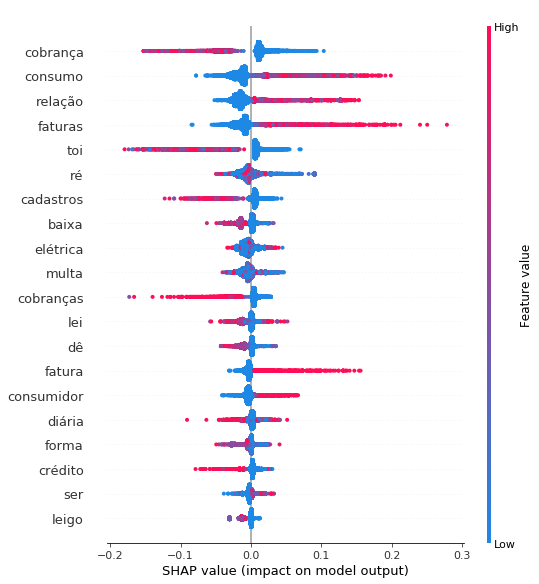

CobrancaSobAmeaca


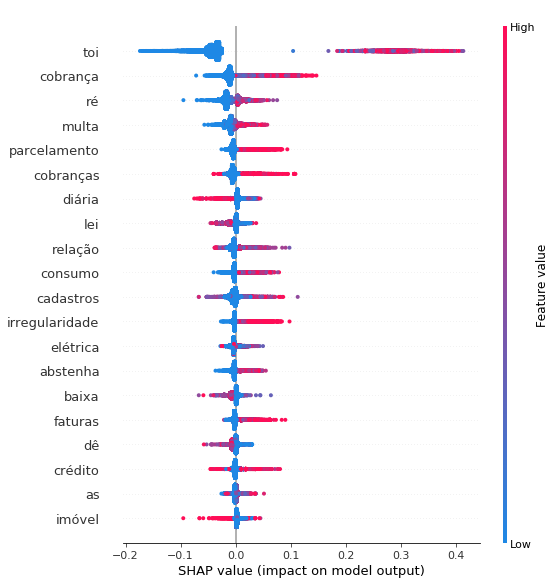

CobrancaTarifa


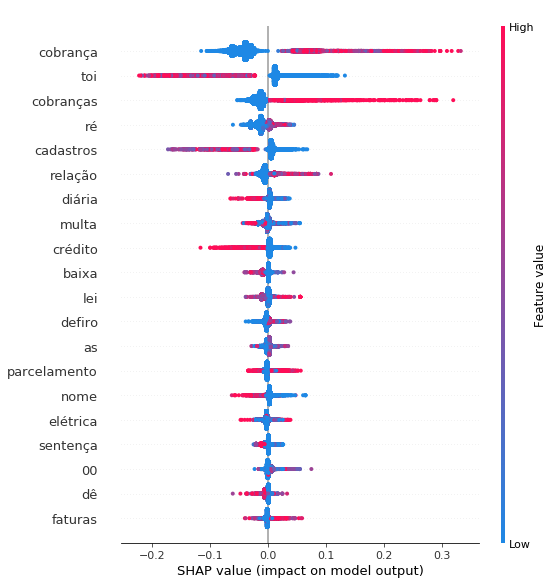

DemandaNaoResolvida


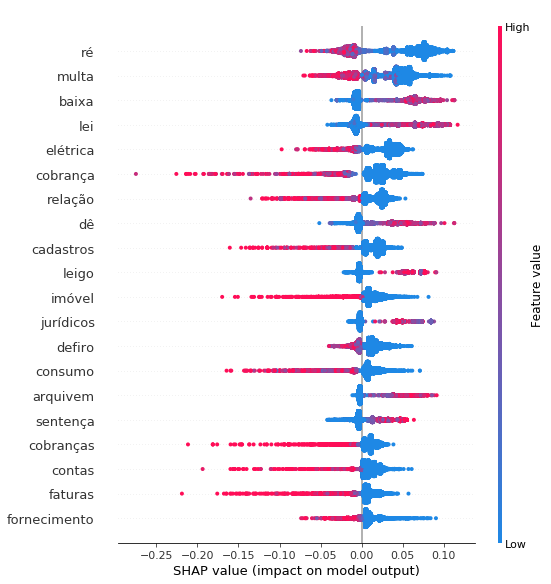

DificuldadeContratacaoRecusaInjustificada


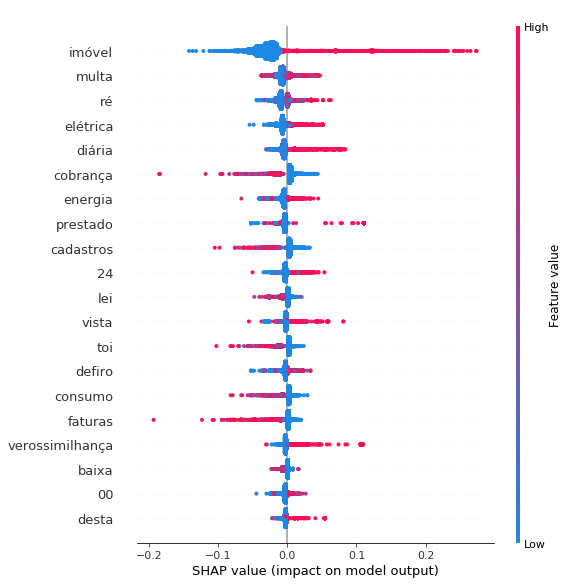

DificuldadeRenegociacao


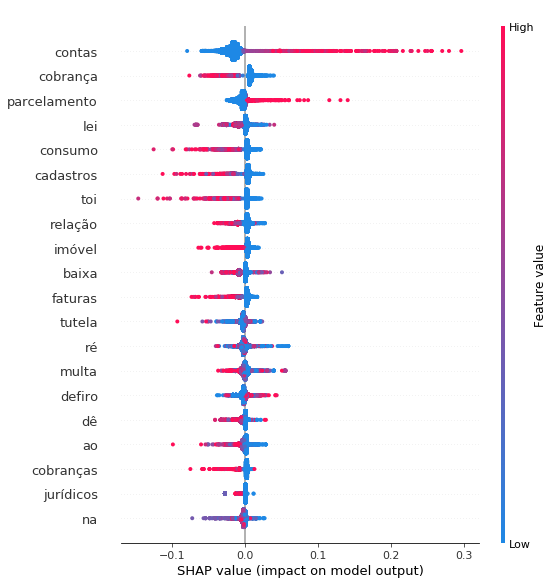

InterrupcaoInstabilidadeFornecimento


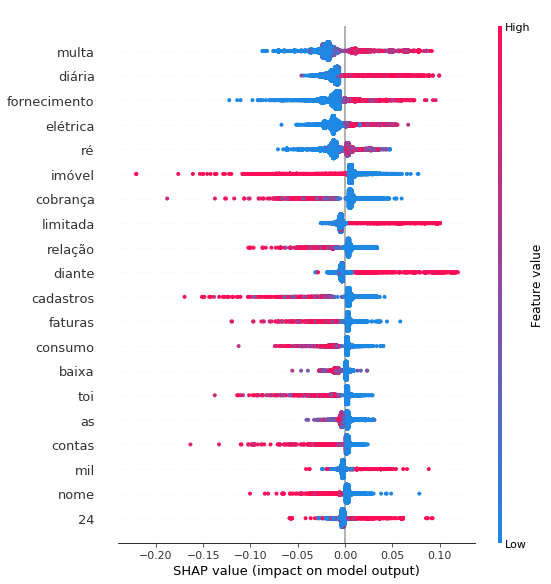

NegativacaoIndevida


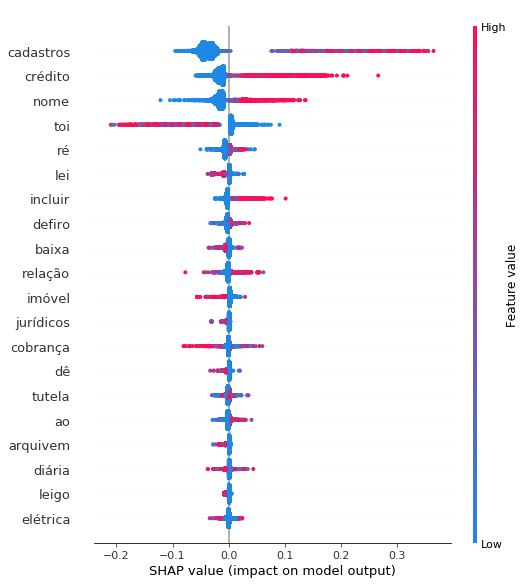

In [20]:
# Make plot. Index of [1] is explained in text below.
for i in range(8):
    print(clf.classes_[i])
    shap.summary_plot(shap_values[i], np.array(val_X_tfidf.todense()), feature_names=vectorizer.get_feature_names())

Here, we can see for each class, the top 20 words in the vocabulary that impact its prediction. Each dot is a data point. The color shows if the feature had a high value (if the word had a high tf-idf for the given document in this case) or not. The x-axis is the SHAP value. Positive SHAP values mean a positive impact towards that class. Negative SHAP values mean a negative impact towards that class.

Taking the example for "CobrancaServicoNaoFornecido", which is the first graph. The word "consumo" and "faturas" seems to have a positive impact in document where its tf-idf was high, while having a negative impact towards that class when its tf-idf was low. The opposite can be seen with the words "cobrança" and "toi". In practice this means documents with the word "consumo" and "faturas" and without the word "cobrança" or "toi" have a higher probability of being put in this class.

These graphs can be used to understand a bit more about what the model is actually learning and using to make its predictions. Sometimes we can find nonsensical patterns. For instance, "DemandaNaoResolvida" indicates the presence of the word "dê" is a sign that the document is part of this class. For a human, this makes absolutely no sense. This could signal a problem with either the model, or the data.

# Part 3 - O Caso Telecom

First, let's begin by classifying some of these cases using the provided table, and putting them in their corresponding folders.

In [21]:
data = []
class_directories = os.listdir('telecom')
for directory in class_directories:
    files = os.listdir(f'telecom/{directory}')
    for file in files:
        f = open(f'telecom/{directory}/{file}', 'r', encoding='utf-8')
        data.append([file, f.read(), directory])
        
columns = ['filename', 'text', 'topic']
df = pd.DataFrame(data, columns=columns)

In [22]:
df.head(5)

,filename,text,topic
0,decisao-0176702-94.2017.8.19.0001-0.txt,Verificou-se pelo sistema DCP (envio eletrônic...,6sky-brasil-servicos-ltda
1,sentenca-0176702-94.2017.8.19.0001-0.txt,"Homologo, por sentença, para que surta seus ef...",6sky-brasil-servicos-ltda
2,sentenca-0055213-87.2017.8.19.0002-0.txt,Trata-se de Reclamação entre as partes acima i...,americana-movil-telecomunicacoes-corporation-l...
3,sentenca-0008010-07.2017.8.19.0075-0.txt,"HOMOLOGO, por sentença, para que produza seus ...",atl-algar-telecom-leste-sa-claro
4,sentenca-0007483-55.2017.8.19.0075-0.txt,HOMOLOGO o projeto de sentença apresentado pel...,atl-algar-telecom-leste-sa-claro-sa


In [23]:
class TelecomTests(unittest.TestCase):
    def test_shouldCorrectlyVectorizeText(self):
        texts = pd.Series([
            "Esta sentença diz respeito a um pacote de serviços (combo) não fornecido pela ré.",
            "Telefonia fixa com banda larga e modem",
            "Um plano pré-pago com várias vantagens!",
            "TV por assinatura disponível só neste mês com diversos canais",
            "3G e 4G apenas aqui!",
            "Internet de verdade só aqui, com celular, pacote de dados e modem velox!",
            "Olá, mundo"
        ])
        terms = ['combo', 
         'pacote', 
         'fixa', 
         'banda larga', 
         'velox', 
         'modem', 
         'internet', 
         'pré pago', 
         'tv por assinatura', 
         'tv', 
         'assinatura', 
         'canais', 
         'pacote de dados', 
         '3g', 
         '4g', 
         'celular', 
         'telefone móvel'
        ]
        vectorized_texts = pd.DataFrame(np.array([
                                                 [1, 0, 0, 0, 0, 0, 0],
                                                 [1, 0, 0, 0, 0, 1, 0],
                                                 [0, 1, 0, 0, 0, 0, 0],
                                                 [0, 1, 0, 0, 0, 0, 0],
                                                 [0, 0, 0, 0, 0, 1, 0],
                                                 [0, 1, 0, 0, 0, 1, 0],
                                                 [0, 0, 0, 0, 0, 1, 0],
                                                 [0, 0, 1, 0, 0, 0, 0],
                                                 [0, 0, 0, 1, 0, 0, 0],
                                                 [0, 0, 0, 1, 0, 0, 0],
                                                 [0, 0, 0, 1, 0, 0, 0],
                                                 [0, 0, 0, 1, 0, 0, 0],
                                                 [0, 0, 0, 0, 0, 1, 0],
                                                 [0, 0, 0, 0, 1, 0, 0],
                                                 [0, 0, 0, 0, 1, 0, 0],
                                                 [0, 0, 0, 0, 0, 1, 0],
                                                 [0, 0, 0, 0, 0, 0, 0]
                                    ]).T, columns=terms, dtype=np.int64)
        assert_frame_equal(vectorize_texts(texts, terms), vectorized_texts)
        
    def test_shouldCorrectlyClassifyText(self):
        test_df = pd.DataFrame({
             'combo': [1, 0, 0, 0, 0, 0, 0],
             'pacote': [0, 0, 0, 0, 0, 0, 0],
             'fixa': [1, 1, 1, 0, 0, 0, 0],
             'banda larga': [1, 1, 1, 0, 0, 0, 0],
             'velox': [1, 1, 1, 0, 0, 0, 0],
             'modem': [1, 1, 1, 0, 0, 0, 0],
             'internet': [1, 0, 1, 0, 0, 0, 0],
             'pré pago': [1, 0, 0, 1, 1, 0, 0],
             'tv por assinatura': [1, 0, 0, 0, 1, 0, 0],
             'tv': [0, 0, 0, 1, 1, 0, 0],
             'assinatura': [0, 0, 0, 1, 1, 0, 0],
             'canais': [0, 0, 0, 1, 0, 0, 0],
             'pacote de dados': [0, 0, 0, 0, 0, 1, 0],
             '3g': [0, 0, 0, 0, 0, 0, 0],
             '4g': [0, 0, 0, 0, 0, 1, 0],
             'celular': [0, 0, 0, 0, 0, 0, 1],
             'telefone móvel': [0, 0, 0, 0, 0, 0, 0]
        })
        term_classifier = [
            {'topic': 'Pacote de Serviços (Combo)', 
             'with_terms': ['combo', 'pacote'], 
             'without_terms': []},
            {'topic': 'Telefonia Fixa', 
             'with_terms': ['fixa', 'banda larga', 'velox', 'modem'], 
             'without_terms': ['internet', 'combo']},
            {'topic': 'Internet Fixa', 
             'with_terms': ['fixa'], 
             'without_terms': []},
            {'topic': 'Telefonia Móvel Pré-paga', 
             'with_terms': ['pré pago'], 
             'without_terms': ['tv por assinatura']},
            {'topic': 'TV por assinatura', 
             'with_terms': ['tv', 'assinatura', 'canais'], 
             'without_terms': ['combo']},
            {'topic': 'Internet Móvel', 
             'with_terms': ['pacote de dados', '3g', '4g'], 
             'without_terms': []},
            {'topic': 'Telefonia Móvel Pós-paga', 
             'with_terms': ['celular', 'telefone móvel'], 
             'without_terms': []}
        ]
        test_topics = [
             'Pacote de Serviços (Combo)',
             'Telefonia Fixa',
             'Internet Fixa',
             'Telefonia Móvel Pré-paga',
             'TV por assinatura',
             'Internet Móvel',
             'Telefonia Móvel Pós-paga'
        ]
        self.assertEqual(classify_texts(test_df, term_classifier), test_topics)

In [24]:
def vectorize_texts(texts, terms):
    vectorizer = CountVectorizer(lowercase=True, vocabulary=terms, binary=True, ngram_range=(1,3))
    X_vec = vectorizer.fit_transform(texts)
    df_vec = pd.DataFrame(X_vec.todense(), columns=terms)
    return df_vec

In [25]:
def classify_texts(df, terms_classes):
    text_topics = np.full(df.shape[0], '')
    text_topics = np.where(text_topics == '', text_topics, text_topics)
    for topic in terms_classes:
        fulfilled_conditions = np.zeros(df.shape[0], dtype=np.int8)
        for with_term in topic['with_terms']:
            fulfilled_conditions = np.logical_or(fulfilled_conditions, df[with_term] == 1)
        for without_term in topic['without_terms']:
            fulfilled_conditions = np.logical_and(fulfilled_conditions, df[without_term] == 0)
        text_topics = np.where(np.logical_and(fulfilled_conditions, text_topics == ''), 
                                        topic['topic'], 
                                        text_topics)
    text_topics = np.where(text_topics == '', 'Unknown', text_topics)
    return list(text_topics)

In [26]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

EE..C:\Users\berna\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
.
ERROR: test_fShouldRaiseExceptionWithNegativeArgument (__main__.FibonacciTests)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-2-f035ee560cc3>", line 9, in test_fShouldRaiseExceptionWithNegativeArgument
    f(-1)
TypeError: '_io.TextIOWrapper' object is not callable

ERROR: test_fShouldReturnCorrectAnswer (__main__.FibonacciTests)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-2-f035ee560cc3>", line 3, in test_fShouldReturnCorrectAnswer
    self.assertEqual(

### First step, vectorizing the texts using the terms in the table

In [27]:
terms = ['combo', 
         'pacote', 
         'fixa', 
         'banda larga', 
         'velox', 
         'modem', 
         'internet', 
         'pré pago', 
         'tv por assinatura', 
         'tv', 
         'assinatura', 
         'canais', 
         'pacote de dados', 
         '3g', 
         '4g', 
         'celular', 
         'telefone móvel']

In [28]:
df_vec = vectorize_texts(df.text, terms)

In [29]:
df_vec.sum()

combo                  95
pacote                234
fixa                  389
banda larga            59
velox                   9
modem                  19
internet              584
pré pago              167
tv por assinatura     262
tv                    672
assinatura           1037
canais                203
pacote de dados         7
3g                     19
4g                     12
celular               520
telefone móvel         43
dtype: int64

### Second step: classifying the vectors according to a defined logic

Initially, a logical AND was used with the terms pertaining to each theme. In other words, for the topic "Pacote de Serviços", both "combo" and "pacote" should be present for the text to be considered part of it. However, this logic presents some problems. If a text contains only "pacote" or "combo", it could still, for a human, be considered part of the "Pacote de Serviços" topic. Using an AND logic doesn't capture these cases! Moreover, for some topics with lots of terms, no text was classified in it, since having all those terms appearing together was quite difficult.

As such, a logical OR was tried instead. Here, more texts begun to be classified, and now all topics contain a few texts. Nonetheless, this logic still has problems of its own. In an example, on of the texts was classified as "TV por assinatura", but on further investigation, this was only because it contained a phrase with "assinatura digital no sistema eletrônico processual". The text itself would probably be better classified in "Internet Fixa", but it didn't contain the necessary words for this classification. Yet another text contained the word "canais", but in "canais de comunicação", again being classified, wrongly, as "TV por assinatura".
A sort of redundancy is also created with relation to some terms (for instance, "pacote de dados" is never actually used to classify a document, since, having the word "pacote" in it, it would immediately be used to classify the text as "Pacote de Serviços".

Another issue that needs to be taken into account is that, some terms in the table don't appear to be the most adequate for the topics they are in. For example, it is more likely to see "banda larga", "velox" and "modem" in the context of the Internet, not as much when talking about the telephone.

Lastly, it is possible that a document fits more than one topic at the same time. In one of the decisions found in the data, the author declared having obtained a phone chip with data included, and a modem for her notebook, and that both were defective. This document could be classified as either "Internet Móvel", "Internet Fixa", or even both.

#### Decisions

What I decided to do was, first and foremost, make some changes to the table that define the topics:

<li>"Pacote de Serviços" can only be classified as such if it doesn't contain the term "pacote de dados".</li>
<li>"Banda larga", "velox" and "modem" were moved to "Internet Fixa".</li>

I thought of adding new terms to the table (like "televisão" or "chip"), but this was not done here so as not to change the exercise too much. In a real situation, this should be considered (as well as what terms to add, and verify if they make sense).

I'll consider here that a text can only be classified in a single topic, following the topic order given by the exercise.

A logical OR will be used. It will create more false positives, yes. But I'm assuming that the decrease of false negatives will compensate for this. In order to thoroughly verify this, it would be necessary to manually read and classify the texts, or at least part of them - in other words, create a dataset - on which we could measure the precision and recall of both logics, and of other methods as well. In essence, this would be transforming an unsupervised problem in a supervised one. This will not be done at this moment, however, due to time constraints.

#### Other ideas

Another way of using these terms to perform classification, would be to look at the order in which the terms are found in the documents, instead of defining an order of topics while neglecting altogether the order of the terms. I believe, however, that this escapes completely from what is being asked. This is intended only as a reminder that there are many ways to treat this problem.

In [30]:
term_classifier = [
    {'topic': 'Pacote de Serviços (Combo)', 
     'with_terms': ['combo', 'pacote'],
     'without_terms': ['pacote de dados']},
    {'topic': 'Telefonia Fixa', 
     'with_terms': ['fixa'],
     'without_terms': ['internet', 'combo']},
    {'topic': 'Internet Fixa', 
     'with_terms': ['fixa', 'banda larga', 'velox', 'modem'],
     'without_terms': []},
    {'topic': 'Telefonia Móvel Pré-paga', 
     'with_terms': ['pré pago'], 
     'without_terms': ['tv por assinatura']},
    {'topic': 'TV por assinatura', 
     'with_terms': ['tv', 'assinatura', 'canais'], 
     'without_terms': ['combo']},
    {'topic': 'Internet Móvel', 
     'with_terms': ['pacote de dados', '3g', '4g'], 
     'without_terms': []},
    {'topic': 'Telefonia Móvel Pós-paga', 
     'with_terms': ['celular', 'telefone móvel'], 
     'without_terms': []}
]

In [31]:
topic_list = classify_texts(df_vec, term_classifier)
df['topic'] = topic_list
df.groupby('topic').count()

,filename,text
topic,,
Internet Fixa,120,120
Internet Móvel,23,23
Pacote de Serviços (Combo),293,293
TV por assinatura,1216,1216
Telefonia Fixa,315,315
Telefonia Móvel Pré-paga,144,144
Telefonia Móvel Pós-paga,360,360
Unknown,71334,71334


Now, all that is left is to separate the documents into folders, one for each topic.

In [32]:
folder_names = [
             'Pacote de Serviços (Combo)',
             'Telefonia Fixa',
             'Internet Fixa',
             'Telefonia Móvel Pré-paga',
             'TV por assinatura',
             'Internet Móvel',
             'Telefonia Móvel Pós-paga'
        ]

In [33]:
def create_folders(df, folder_names):
    main_folder = 'output_telecom'
    try: 
        os.makedirs(main_folder)
    except OSError:
        if not os.path.isdir(main_folder):
            raise
    for f_name in folder_names:
        try: 
            os.makedirs(f"{main_folder}/{f_name}")
        except OSError:
            if not os.path.isdir(f"{main_folder}/{f_name}"):
                raise
    
    for row in df.values:
        topic = row[2]
        if topic != 'Unknown':
            filename = row[0]
            text = row[1]
            path = f"{main_folder}/{topic}/{filename}"
            file = open(path, 'w')
            file.write(text)

In [35]:
create_folders(df, folder_names)

### Clustering

In [36]:
df_clustering = df[df.topic == 'Unknown']
X = df_clustering.text

The clusters that we are searching for, ideally would be part of the topic of telecommunications (so that they make sense with the other already defined classes). Also, it is possible (likely even) that a lot of documents of these already defined classes haven't been found by the previous method.

If we build a clusterer without giving it any feedback, the model might even work decently well with well-defined clusters, but it is unlikely that it would find only clusters pertaining to telecommunications. On the other hand, to give it feedback (for example, in the form of a vocabulary that would be important to the task) would require a bigger amount of effort and analysis of the task, as well as of the documents, so as to find the right terms.

Both approaches were made here. For the first approach, a small vocabulary with the previous terms plus a few new terms that could be considered part of telecommunications was created. In the second approach, it was left to decide on what words were important (up to a maximum number).

In both cases, three separate models were built, with 3, 5 and 7 clusters. The quality of the clusters was evaluated using silhouette analysis. TSNE was used to visualize the clusters in a lower-dimensional space (with PCA as a preprocessing stage in the no-feedback approach). Lastly, the top words of each cluster were printed, so as to give us an idea of what comprises each of them.

### With vocabulary

In [37]:
vocabulary = ['combo', 'pacote', 'fixa', 'banda larga', 'velox', 
              'modem', 'internet', 'pré pago', 'tv por assinatura', 'tv', 
              'assinatura', 'canais', 'pacote de dados', '3g', '4g', 
              'celular', 'telefone móvel', 'plano', 'instalação',
              'internet móvel', 'pacote de serviços', 'serviço de telefonia',
              'telefonia fixa', 'telefonia móvel',
              'chip', 'pós pago', 'canais abertos', 'televisão', 'fibra']

In [38]:
#Vectorizes the documents according to the vocabulary
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_df=1.0, min_df=1, vocabulary=vocabulary)
X_tfidf = vectorizer.fit_transform(X).todense()

In [39]:
#Trains the KMeans models
n_clusters = [3,5,7]
models = []

for n_c in n_clusters:
    kmeans = KMeans(n_clusters=n_c, random_state=0)
    kmeans.fit(X_tfidf)
    models.append(kmeans)

In [40]:
#Creates a lower-dimensional representation using TSNE
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X_tfidf)

In [41]:
#Calculates the silhouette scores for the clusters
silhouette_values_for_cluster = []
for ind_i, n_c in enumerate(n_clusters):
    cluster_labels = models[ind_i].predict(X_tfidf)
    silhouette_values_for_cluster.append(silhouette_samples(X_tfidf, cluster_labels, metric='cosine'))

For n_clusters = 3 The average silhouette_score is : 0.0231962010170365


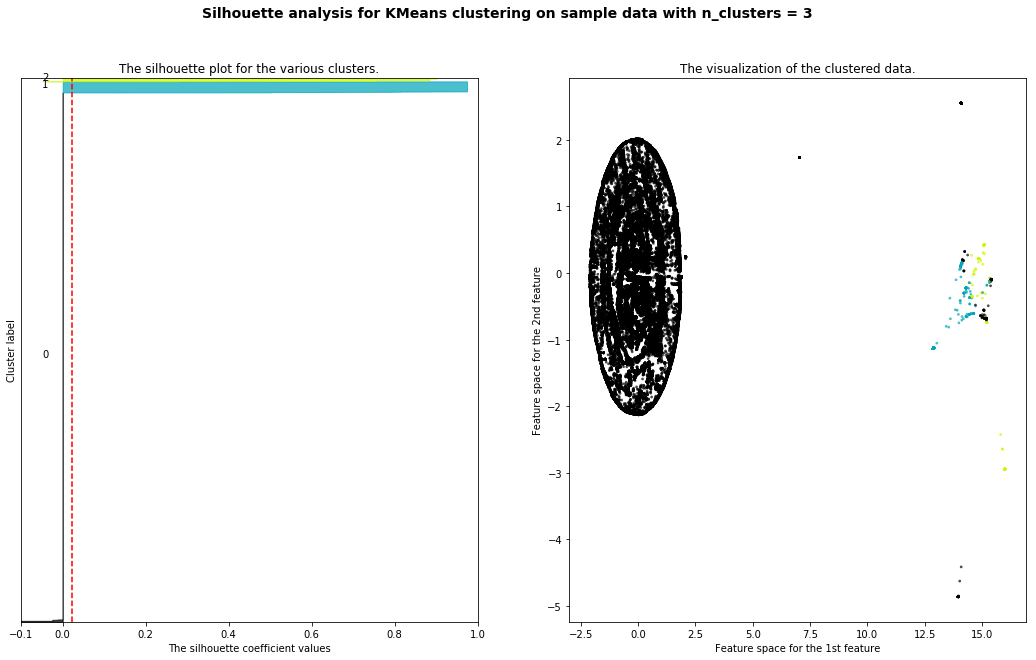

For n_clusters = 5 The average silhouette_score is : 0.026161109906200065


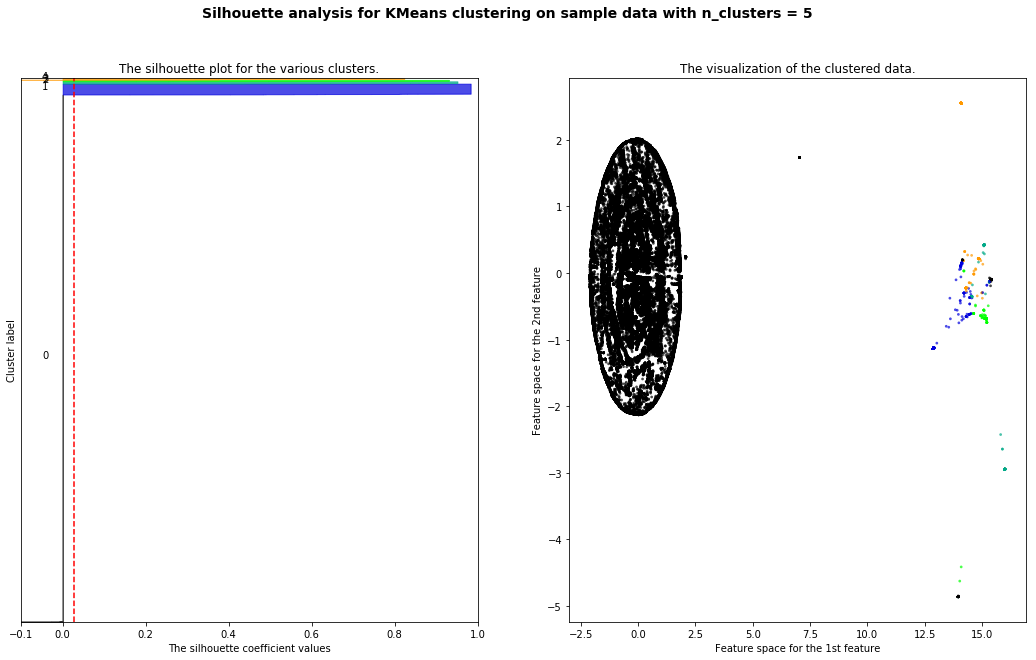

For n_clusters = 7 The average silhouette_score is : 0.02744620968826298


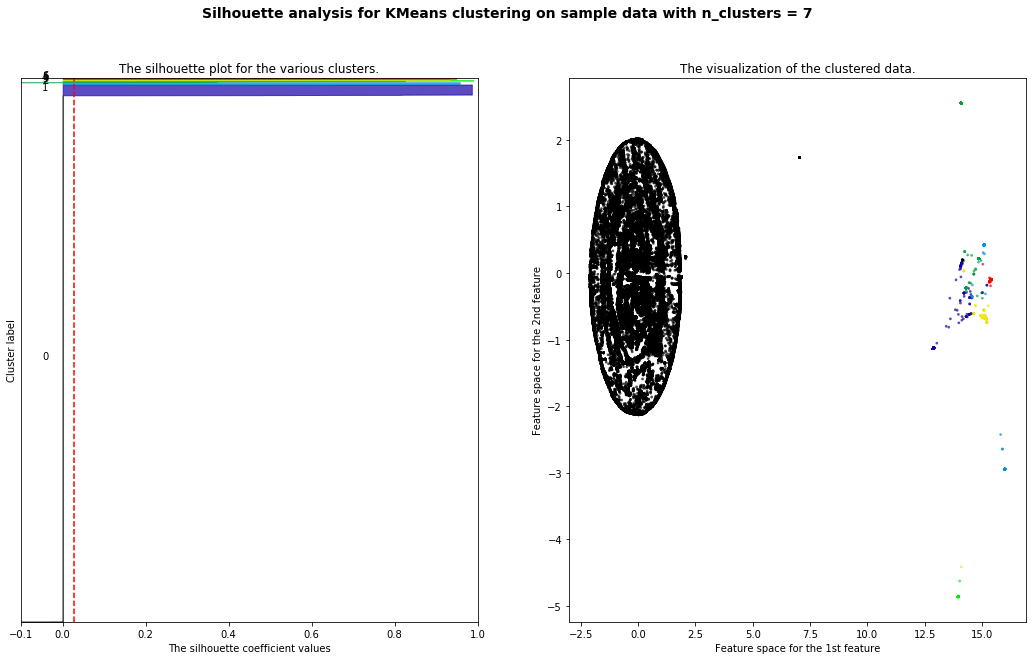

In [42]:
#Use silhouette to check quality of clusters

for ind_i, n_c in enumerate(n_clusters):
    cluster_labels = models[ind_i].predict(X_tfidf)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_tfidf) + (n_c + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    sample_silhouette_values = silhouette_values_for_cluster[ind_i]
    silhouette_avg = sample_silhouette_values.mean()
    
    print("For n_clusters =", n_c,
          "The average silhouette_score is :", silhouette_avg)

    y_lower = 10
    for i in range(n_c):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_c)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_c)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_c),
                 fontsize=14, fontweight='bold')
    plt.show()

In [43]:
#look at what words are most common in each cluster
for ind_i, n_c in enumerate(n_clusters):
    
    print(f"Top terms for model with {n_c} clusters:")

    order_centroids = models[ind_i].cluster_centers_.argsort()[:, ::-1]

    word_feature_names = vectorizer.get_feature_names()
    for i in range(n_c):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :3]:
            print(' %s,' % word_feature_names[ind], end='')
        print()
    print()

Top terms for model with 3 clusters:
Cluster 0: internet, telefonia móvel, chip,
Cluster 1: plano, telefonia móvel, pós pago,
Cluster 2: serviço de telefonia, telefonia móvel, plano,

Top terms for model with 5 clusters:
Cluster 0: chip, instalação, televisão,
Cluster 1: plano, pós pago, internet,
Cluster 2: serviço de telefonia, telefonia móvel, plano,
Cluster 3: internet, plano, internet móvel,
Cluster 4: telefonia móvel, serviço de telefonia, plano,

Top terms for model with 7 clusters:
Cluster 0: televisão, pós pago, plano,
Cluster 1: plano, pós pago, internet,
Cluster 2: serviço de telefonia, telefonia móvel, plano,
Cluster 3: telefonia móvel, serviço de telefonia, plano,
Cluster 4: instalação, internet, serviço de telefonia,
Cluster 5: internet, plano, internet móvel,
Cluster 6: chip, plano, serviço de telefonia,



In all three cases, there's an enormous cluster with null or negative scores. These are the documents for which the defined terms either do not appear at all or very little (as shown by the few negative lines in the silhouette scores, or the black dots on the right of the representation), which shows us that the provided vocabulary was quite bad at its job. For the documents that do have those terms, they appear to form clusters with documents having very high silhouette scores, and also some with negative score. This means that, in clusters like this, there are documents that fit very well in the cluster, but other documents could fit in more than one cluster.

We can also see the top 3 words for each cluster. While it is not possible to confidently identify the subjects by looking at them, it is possible to see, for example, that most clusters are about either telephones or internet. "Combo" and "pacote" aren't the top terms for any of the clusters, and "televisão" only appears in cluster 0 (the 'bad' cluster), but probably doesn't mean anything. In any case, no real meaning can be taken off of these clusters, except that they'd need more work.

### Without vocabulary

In [44]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), max_df=0.3, min_df=10, max_features=1000)
X_tfidf = vectorizer.fit_transform(X).todense()
X_tfidf.shape

(71334, 1000)

In [45]:
n_clusters = [3,5,7]
models = []

for n_c in n_clusters:
    kmeans = KMeans(n_clusters=n_c, random_state=0)
    kmeans.fit(X_tfidf)
    models.append(kmeans)

In [46]:
pca = PCA(n_components = 50)
X_pca = pca.fit_transform(X_tfidf)
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X_pca)

In [47]:
silhouette_values_for_cluster = []
for ind_i, n_c in enumerate(n_clusters):
    cluster_labels = models[ind_i].predict(X_tfidf)
    silhouette_values_for_cluster.append(silhouette_samples(X_tfidf, cluster_labels, metric='cosine'))

For n_clusters = 3 The average silhouette_score is : 0.07684982508824145


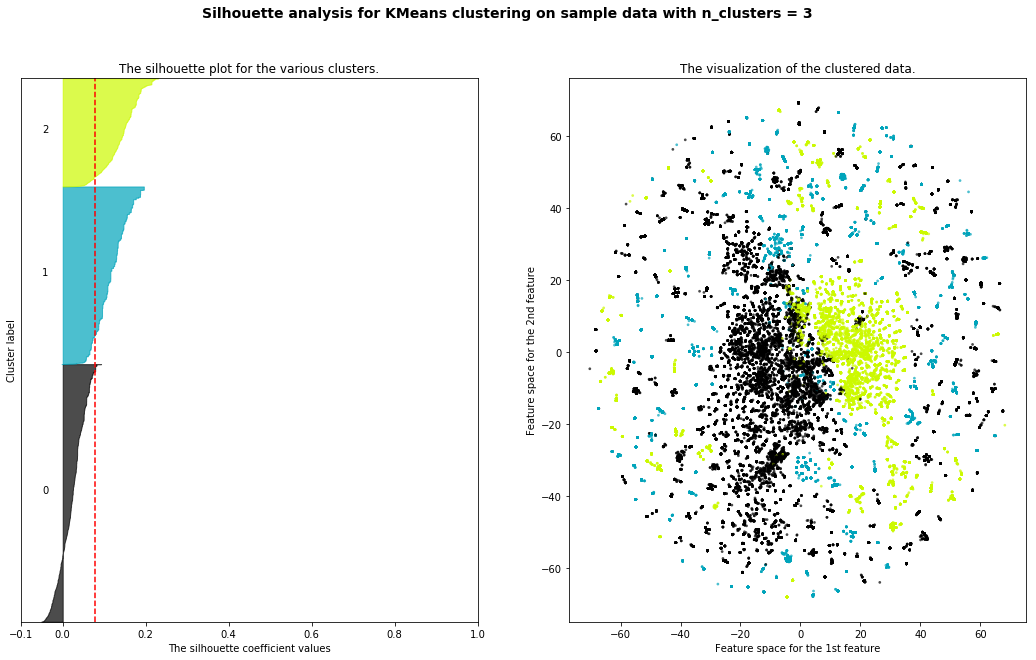

For n_clusters = 5 The average silhouette_score is : 0.08154949049354743


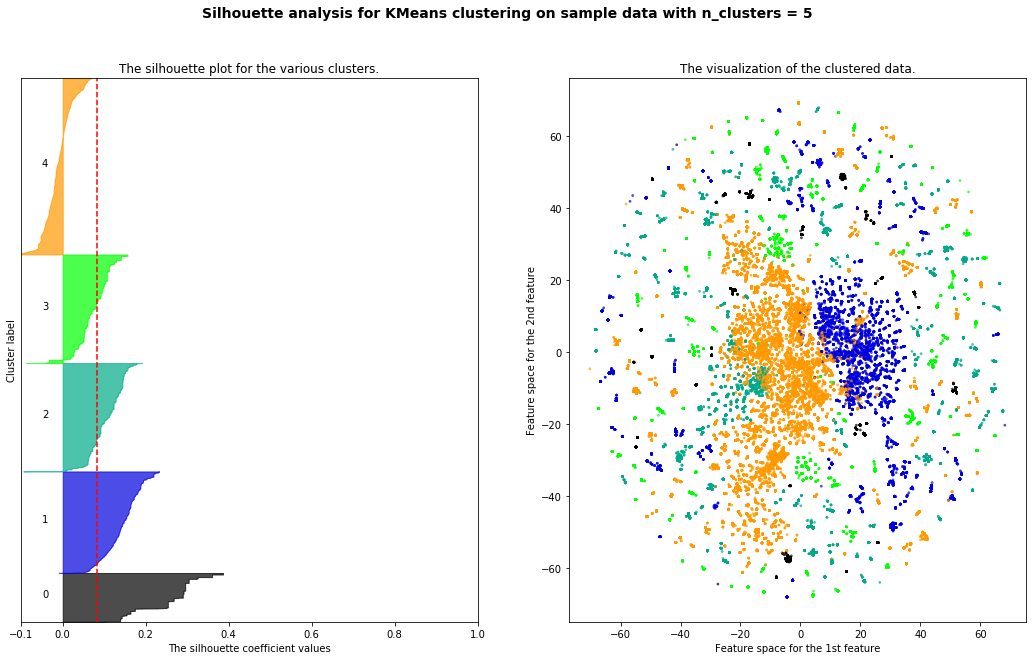

For n_clusters = 7 The average silhouette_score is : 0.10377077915426253


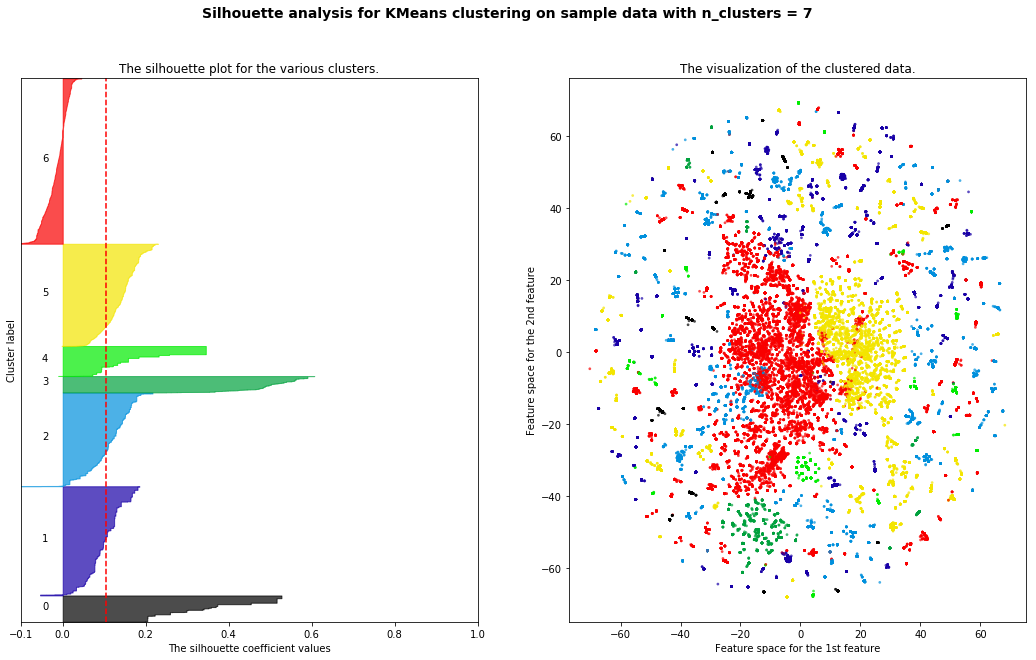

In [48]:
#Use silhouette to check quality of clusters
#sample_indexes = sample_without_replacement(len(X_tfidf), n_samples=70000)

for ind_i, n_c in enumerate(n_clusters):
    cluster_labels = models[ind_i].predict(X_tfidf)
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_tfidf) + (n_c + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    sample_silhouette_values = silhouette_values_for_cluster[ind_i]
    silhouette_avg = sample_silhouette_values.mean()
    
    print("For n_clusters =", n_c,
          "The average silhouette_score is :", silhouette_avg)

    y_lower = 10
    for i in range(n_c):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_c)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_c)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_c),
                 fontsize=14, fontweight='bold')
    plt.show()

In [49]:
#look at what words are most common in each cluster
for ind_i, n_c in enumerate(n_clusters):
    
    print("Top terms for model with {} clusters:".format(n_c))

    order_centroids = models[ind_i].cluster_centers_.argsort()[:, ::-1]

    word_feature_names = vectorizer.get_feature_names()
    for i in range(n_c):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :5]:
            print(' %s,' % word_feature_names[ind], end='')
        print()
    print()

Top terms for model with 3 clusters:
Cluster 0: 487, julgo, custas, pelas, arquive,
Cluster 1: 40, nº, projeto, ato, leigo,
Cluster 2: tutela, 300, direito, urgência, requisitos,

Top terms for model with 5 clusters:
Cluster 0: contados, corridos, 2016, prazos, juizados,
Cluster 1: tutela, 300, direito, urgência, requisitos,
Cluster 2: 487, julgo, pelas, celebrado, custas,
Cluster 3: ato, arquivamento, projeto, 40, nº,
Cluster 4: seu, fls, nº, recurso, embargos,

Top terms for model with 7 clusters:
Cluster 0: tratando, arquivamento, proceda, manifestação, improcedência,
Cluster 1: ato, nº, 1º, tj, 2016,
Cluster 2: 487, pelas, julgo, celebrado, resolução,
Cluster 3: contrarrazões, recorrido, recurso, recebo, recursal,
Cluster 4: leigo, 40, juiz, presidiu, faço,
Cluster 5: tutela, 300, direito, urgência, requisitos,
Cluster 6: custas, fls, nº, julgo, arquive,



It is worth noting, first and foremost, that very little text pre-processing was made here. All that was done is what TFIDFVectorizer already does. That is: lowercase transformation, punctuation removal, and corpus-specific stopword removal (by the means of the df_max and df_min hyperparameters, that define how many times a document can appear in the corpus without being considered a stopword). Other preprocessing that could be useful would be, for instance: removing portuguese stopwords; removing numbers; defining min length of words; portuguese stemming or lemmatization; maybe even named entity recognition and removal, among other possibilities.

With that said, let's analyze the results: <br>
The model with the highest average silhouette score, is the one with 7 clusters, so that's the one we'll be talking about from now on. Overall, it looks quite a bit better than what was found in the no-feedback cases, albeit with no cluster getting even near the 1.0 score mark. The PCA + TSNE representation shows a more spread out mass this time around, but the clusters aren't very easy to identify either. <br>
The cluster with the highest score overall is cluster number 3. Its top words ("recorrido", "recurso", "contrarrazões") seems to indicate that the documents included here involved some sort of appeal from one of the parts. The other clusters' top words don't point nearly as much towards a given direction. <br>
As expected, however, the sense of telecommunications is practically gone. This approach could be useful to find new topics (or ideas for new topics), like the appeal cluster, but I don't see it working to find new clusters in the telecommunications domain without some sort of expert feedback. <br>

#### Conclusions

More investigation is necessary to build a production-ready clustering model. First of all, a better understanding of the documents is essential, and a bigger focus on preprocessing than what has been given during this task. <br>
Also, KMeans was used here, but it is possible some other clustering algorithm would work better for these types of documents. LDA (Latent Dirichlet Allocation) could work to identify multiple topics in the texts, but it tends to work poorly when the dataset is small and the documents are not big enough. <br>
Another option would be to put more effort into manually classifying the texts and work in a supervised learning environment instead. Sometimes, taking the time to label the documents and defining the classes to then build a supervised learning model could prove more cost-efficient then putting the effort to build an unsupervised model. <br>